# Homework 2: Numpy

**Student information**

Student ID: 20127370

Student Fullname: Mai Quý Trung

## Instructions for homework and submission

&#9889; It's important to keep in mind that the teaching assistants will use a grading support application, so you must strictly adhere to the guidelines outlined in the instructions. If you are unsure, please ask the teaching assistants or the lab instructors as soon as you can. <font color=red>Do not follow your personal preferences at random. </font>

### Instructions for doing homework

The exercise will be completed directly from this notebook file. First, fill in the file header above with your name and student ID. You fill out the assignment in the notebook file where the given task starts with these patterns below: 
for required parts to implement
```python
# YOUR CODE HERE
raise NotImplementedError()
```
or for optional parts:
```python
# YOUR CODE HERE (OPTION)
```
or for markdown cell:
```markdown
YOUR ANSWER HERE
```

Actually, when doing the lab, you just need to remove the line `raise NotImplementedError()`.

There will typically be a cell (or several cells) with test suites to let you determine if the code is correct or not directly below the areas that require code that you need to implement; If there are no errors in this cell, the tests were successful.
In some circumstances, test suites may be insufficient, meaning that even if the test passes but the code fails, it may not necessarily be correct. 

You can print on the screen as you work in the lab to generate more test cells. However, you can either erase the cells you make or add a comment to the statements that are displayed on the screen when you submit. <font color=red>Please be aware that you are not permitted to remove cells or change the coding of the teacher/assistant/lab instructor by yourselves (except where editing is allowed as mentioned above). </font>

Try to keep the code organized and clear; name proposed variables, add comments when necessary, and limit the length of each line of code (because otherwise the reader will have to scroll). Use this guideline if needed: a line of code should not exceed 79 characters. 

It is advised to frequently press CTRL + S while performing the workouts to save your work and prevent data loss.

*Keep in mind that <font color=green>knowledge and honest learning are the major objectives here</font>. Thoughts can be discussed, the work and <font color=green>code should be original to you and reflect your actual understanding</font>. <font color=red>Violations will result in a total course grade of zero.</font>*

Other advice includes:
- Starting early and not waiting until the last minute
- Proceed with caution and gentleness. Coding in a very slow, but also very fast, manner. 
- Avoid sources of interference, such as social networks, games, etc.

### Instructions for submission

Your work will be graded by selecting `Kernel-Restart & Run All` to restart and run every cell in your notebook while grading. As a result, you should test run `Kernel-Restart` & `Run All` before submitting your work to ensure everything is working as it should.

Then you create a submission folder with the following structure:
- The `StudentID` folder (e.g., if you have an student ID of 1234567, name the folder 1234567):
  - File `Homework_2.ipynb` (no need to submit other files)

Finally, compress this `StudentID` folder with *.zip format and submit it on Moodle. <font color=red>Please be sure to strictly follow the submission rules.</font>

## Programming environment

In this course, we strictly follow three main rules below:
- Programming on Linux environment to complete the labs (you have set up in HW0).
- Use Jupyter Notebook or Jupyter Lab to complete the tasks assigned in the `.ipynb` file. Note that: <font color=red>you are NOT ALLOWED to use Google Colab</font>, because it can delete some meta data that our grading support program has created in the exercise file.
- Use the package version as in the file "min_ds-env.yml" (you see in HW0 how to use Conda to create a code environment from the `.yml` file and how to activate this environment after it is created)

In [2]:
import sys
sys.executable

'/Users/quytrungg/opt/anaconda3/envs/min_ds-env/bin/python'

If there are no any issues/ problems, the file to run python will be the file of the "min_ds-env" code environment.

To complete this lab, you are allowed to use the Python programming language; do not use any additional libraries such as Numpy, Pandas, etc. Furthermore, you also do not use any additional libraries such as `csv` for reading or writing files in Python.

## Import the necessary libraries

In [3]:
import numpy as np

# TEACHER ADDITIONAL CODE
import warnings

warnings.simplefilter("ignore", category=RuntimeWarning) 
np.seterr(divide='ignore', invalid='ignore')

# YOUR CODE HERE (OPTION)

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Research: The reason to use NumPy?

In [4]:
# Import libraries that help us generate number in randomly
import random

# First, we initialize two matrices that have a size of 1000 x 500 and 500 x 1000, respectively.
nrows1 = 1000; ncols1 = nrows2 = 500; ncols2 = 1000

m1_list = []
for r in range(nrows1):
    row_vals = []
    for c in range(ncols1):
        row_vals.append(random.randint(-100, 100))
    m1_list.append(row_vals)
    
m2_list = []
for r in range(nrows2):
    row_vals = []
    for c in range(ncols2):
        row_vals.append(random.randint(-100, 100))
    m2_list.append(row_vals)
    
print(len(m1_list), len(m1_list[0]))
print(len(m2_list), len(m2_list[0]))

1000 500
500 1000


In [13]:
%%time 
# use this to calculate the runtime

# It's very easy to implement matrix multiplication by using two for loop here.
m3_list = []
for r in range(nrows1):
    row_vals = []
    for c in range(ncols2):
        temp = 0
        for i in range(ncols1):
            temp += m1_list[r][i] * m2_list[i][c]
        row_vals.append(temp)
    m3_list.append(row_vals)

CPU times: user 3min 30s, sys: 1.23 s, total: 3min 31s
Wall time: 3min 34s


Here we perform multiplication for a matrix by using a NumPy array. Please note that the "@" denotes the multiply operator for matrix in NumPy.

In [5]:
# First, we initialize two NumPy matrices from the two previous matrices, which are in the normal Python list datatype.
m1_array = np.array(m1_list)
m2_array = np.array(m2_list)

In [6]:
%%time
# Then, we calculate the running time
m3_array = m1_array @ m2_array

CPU times: user 941 ms, sys: 27.7 ms, total: 968 ms
Wall time: 1.04 s


Compare two ways:

- Code writing time: <font color=green>NumPy writes code much faster.</font>
- Runtime: <font color=green>NumPy for much faster speed.</font>
- Result: <font color=green>Same (Daijoubu!)</font>

### So, we can go deeper to know how to initialize NumPy array & check the property of a NumPy array

In [7]:
# We can initilize a NumPy array from list (1-dimensional)
# You can see an example below:
a = np.array([5, 6, 7, 8], dtype='float')
a

array([5., 6., 7., 8.])

In [8]:
# We can initilize a NumPy array from list (2-dimensional)
b = np.array([[5, 6, 7, 8], [9, 0, 1, 2]])
b

array([[5, 6, 7, 8],
       [9, 0, 1, 2]])

In [9]:
# We can check some information of a NumPy array
print('Number of dimension:', b.ndim)
print('Number of elements for each dimension:', b.shape)
print('Total elements:', b.size)
print('Data type for each element:', b.dtype)
print('Size (byte) of each element', b.itemsize)
print('Total size (byte):', b.nbytes)

Number of dimension: 2
Number of elements for each dimension: (2, 4)
Total elements: 8
Data type for each element: int64
Size (byte) of each element 8
Total size (byte): 64


In [10]:
# Initilize an array with fullfil one given value, example 0
a = np.full((2,3),0) 
# Shortcut: np.zeros((2,3)) (similar to np.ones)
a

array([[0, 0, 0],
       [0, 0, 0]])

In [11]:
# Initilize an array of randomly generated numbers
# For example, integers are generated uniformly in [0, 10)
a = np.random.randint(0, 10, (2, 3))
a

array([[6, 1, 8],
       [3, 4, 5]])

In [12]:
# Initilize an empty array (have no initilize values)
a = np.empty((2, 3))
a

array([[2.31584178e+077, 2.31584178e+077, 1.48219694e-323],
       [0.00000000e+000, 0.00000000e+000, 4.17201348e-309]])

In [13]:
# Initilize an identity matrix
a = np.eye(3)
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
# Initilize an array of evenly spaced numbers
# For example, the target array should be included: 1, 1.5, 2, 2.5, ..., 5
# Solution 1: we can set the start value, end value and the step size
a = np.arange(1, 5.1, 0.5)
a

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [15]:
# Initilize an array of evenly spaced numbers
# For example, the target array should be included: 1, 1.5, 2, 2.5, ..., 5
# Solution 2: we can set the start value, end value and the number of elements
a = np.linspace(1, 5, 9)
a

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [16]:
# Initilize an array other array by changing the shape
a = np.arange(6)
print(a)
b = a.reshape((2, 3), order='C')
print()
print(b)

[0 1 2 3 4 5]

[[0 1 2]
 [3 4 5]]


In [17]:
# `b` points to an array object other than `a`:
b is a

False

If the object to which `b` points is completely independent of the object to which `a` points, then `b` is called `a` deep copy of `a` when the data in `b` is changed. (for example, `b[0, 0] = 99`) does not affect the data in `a`.

And if the object that `b` points to shares data (an object with quite a few elements, including data) with the object that `a` points to, then `b` is called a view (shallow copy) of `a` when changing data in `b` will change data in `a`.

Here, `b` is obtained by reshaping `a`. So, is `b` a copy or a view of `a`?

One way is to check `b.flags.owndata`. If the result is True, it means that `b` has data independent of `b`, i.e., `b` is a copy of `a`; otherwise, `b` is the view of `a`.

In [18]:
print(a.flags.owndata)
print(b.flags.owndata)

True
False


In [19]:
b[0, 0] = 99
a

array([99,  1,  2,  3,  4,  5])

### Access (and modify) a NumPy array element. 

- Integer indexing
- Slicing
- Bool array indexing
- Integer array indexing
- Combine the above 4 techniques together (when working with multidimensional arrays)

In [20]:
# Integer indexing. References: https://docs.scipy.org/doc/numpy-1.10.4/reference/arrays.indexing.html
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[1:7:3]

array([1, 4])

In [21]:
x[-3:3:-1]

array([7, 6, 5, 4])

In [22]:
# slicing
x = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
x[:5, :3]

array([[1, 2, 3],
       [6, 7, 8]])

### Apply these techniques in toy example

Make an array of the scores in this subject from the file 'P4DS-Grades.csv.' (There aren't many of you, don't worry). The first three columns correspond to three HW points (each HW accounts for half of the total points). The final column of the project score (which accounts for 50% of the total score)

In [23]:
p4ds_grades = np.genfromtxt('data/P4DS-Grades.csv', delimiter=',', skip_header=1)
p4ds_grades

array([[ 0.  ,  0.  ,  0.  ,  0.  ],
       [10.  , 10.  , 10.  ,  9.5 ],
       [10.  ,  9.25,  9.  ,  7.  ],
       [10.  ,  9.5 ,  9.85,  8.  ],
       [10.  ,  9.75,  9.75,  9.  ],
       [10.  , 10.  , 10.  ,  8.5 ],
       [10.  , 10.  ,  9.75,  9.  ],
       [10.  ,  9.5 ,  9.7 ,  9.  ],
       [10.  ,  9.75,  9.35,  9.  ],
       [10.  , 10.  ,  9.6 ,  8.  ],
       [ 9.  ,  9.25,  9.9 ,  7.5 ],
       [10.  , 10.  , 10.  ,  8.  ],
       [10.  ,  8.5 ,  5.75,  7.  ],
       [10.  ,  9.5 ,  9.75,  8.  ],
       [ 9.25, 10.  , 10.  ,  8.5 ],
       [10.  , 10.  , 10.  , 10.  ],
       [ 8.5 ,  8.25,  0.  ,  0.  ],
       [10.  , 10.  ,  9.9 ,  9.  ],
       [10.  ,  9.5 ,  9.45,  9.  ],
       [ 9.75, 10.  , 10.  ,  9.  ],
       [10.  , 10.  ,  9.  , 10.  ],
       [10.  ,  9.75, 10.  , 10.  ],
       [ 9.75,  9.5 ,  5.25,  6.5 ],
       [ 9.75,  9.75, 10.  ,  9.5 ],
       [ 9.5 , 10.  , 10.  ,  7.5 ],
       [10.  ,  9.25,  9.9 ,  9.  ],
       [10.  , 10.  , 10.  ,  7.5 ],
 

Question: What is the final project score of the first student?

In [24]:
# Using Integer indexing technique
p4ds_grades[0, -1]

0.0

Question: What is the final project score of the last student?

In [25]:
# Using Integer indexing technique
p4ds_grades[-1, -1]

8.0

The teacher needs to change the project score for the first student to 0.5, so we can apply this change by

In [26]:
# Using Integer indexing technique
p4ds_grades[0, -1] = 0.5
p4ds_grades

array([[ 0.  ,  0.  ,  0.  ,  0.5 ],
       [10.  , 10.  , 10.  ,  9.5 ],
       [10.  ,  9.25,  9.  ,  7.  ],
       [10.  ,  9.5 ,  9.85,  8.  ],
       [10.  ,  9.75,  9.75,  9.  ],
       [10.  , 10.  , 10.  ,  8.5 ],
       [10.  , 10.  ,  9.75,  9.  ],
       [10.  ,  9.5 ,  9.7 ,  9.  ],
       [10.  ,  9.75,  9.35,  9.  ],
       [10.  , 10.  ,  9.6 ,  8.  ],
       [ 9.  ,  9.25,  9.9 ,  7.5 ],
       [10.  , 10.  , 10.  ,  8.  ],
       [10.  ,  8.5 ,  5.75,  7.  ],
       [10.  ,  9.5 ,  9.75,  8.  ],
       [ 9.25, 10.  , 10.  ,  8.5 ],
       [10.  , 10.  , 10.  , 10.  ],
       [ 8.5 ,  8.25,  0.  ,  0.  ],
       [10.  , 10.  ,  9.9 ,  9.  ],
       [10.  ,  9.5 ,  9.45,  9.  ],
       [ 9.75, 10.  , 10.  ,  9.  ],
       [10.  , 10.  ,  9.  , 10.  ],
       [10.  ,  9.75, 10.  , 10.  ],
       [ 9.75,  9.5 ,  5.25,  6.5 ],
       [ 9.75,  9.75, 10.  ,  9.5 ],
       [ 9.5 , 10.  , 10.  ,  7.5 ],
       [10.  ,  9.25,  9.9 ,  9.  ],
       [10.  , 10.  , 10.  ,  7.5 ],
 

Question: What the score of all homework for the first five students?

In [27]:
# Using Slicing technique
p4ds_grades[:5, :3]

array([[ 0.  ,  0.  ,  0.  ],
       [10.  , 10.  , 10.  ],
       [10.  ,  9.25,  9.  ],
       [10.  ,  9.5 ,  9.85],
       [10.  ,  9.75,  9.75]])

The teacher needs to extract the final project score columns, so we can apply a technique to solve this task.

In [30]:
# Using Slicing technique
p4ds_grades[:, -1:]

array([[ 0.5],
       [ 9.5],
       [ 7. ],
       [ 8. ],
       [ 9. ],
       [ 8.5],
       [ 9. ],
       [ 9. ],
       [ 9. ],
       [ 8. ],
       [ 7.5],
       [ 8. ],
       [ 7. ],
       [ 8. ],
       [ 8.5],
       [10. ],
       [ 0. ],
       [ 9. ],
       [ 9. ],
       [ 9. ],
       [10. ],
       [10. ],
       [ 6.5],
       [ 9.5],
       [ 7.5],
       [ 9. ],
       [ 7.5],
       [ 9.5],
       [ 7. ],
       [ 7.5],
       [ 9. ],
       [ 9. ],
       [ 7. ],
       [ 7. ],
       [ 7.5],
       [ 6.5],
       [ 6.5],
       [ 7. ],
       [ 8.5],
       [ 6.5],
       [ 9. ],
       [ 8.5],
       [10. ],
       [ 9. ],
       [ 8. ]])

Combination of slicing and integer indexing

In [31]:
# By using slicing and combining slicing with integer indexing, get the final project score column
p4ds_grades[:, -1]

array([ 0.5,  9.5,  7. ,  8. ,  9. ,  8.5,  9. ,  9. ,  9. ,  8. ,  7.5,
        8. ,  7. ,  8. ,  8.5, 10. ,  0. ,  9. ,  9. ,  9. , 10. , 10. ,
        6.5,  9.5,  7.5,  9. ,  7.5,  9.5,  7. ,  7.5,  9. ,  9. ,  7. ,
        7. ,  7.5,  6.5,  6.5,  7. ,  8.5,  6.5,  9. ,  8.5, 10. ,  9. ,
        8. ])

In [32]:
# What is the final student score? (retrieves a one-dimensional array by slicing)
p4ds_grades[-1, :] # Or: p4ds_grades[-1]

array([ 9.75, 10.  , 10.  ,  8.  ])

You can also use boolean indexing

In [35]:
# For example, it is necessary to take out the final project points < 5
final_grades = p4ds_grades[:, -1]
mask = final_grades < 5
final_grades[mask]
# final_grades[final_grades < 5]

array([0.5, 0. ])

Calculations with NumPy are relatively simple. To effectively use Numpy, we should shift our perspective: We should consider <font color=blue>the computation operations on the entire array</font> that Numpy provides, rather than the calculations on individual numbers.

Almost every array operation we can think of is already provided by Numpy. So, for a certain computation on the Numpy array, in addition to the function (or operator) form, we can usually also call the equivalent method from the Numpy array.

In [38]:
# Calculate the min, max of each score column to check if there is anything out of the ordinary
print(np.min(p4ds_grades, axis=0))
print(np.max(p4ds_grades, axis=0))

[0. 0. 0. 0.]
[10. 10. 10. 10.]


In [39]:
# Calculate the summary score column
avg_grades = (p4ds_grades[:, 0] * 0.5 / 3
              + p4ds_grades[:, 1] * 0.5 / 3
              + p4ds_grades[:, 2] * 0.5 / 3
              + p4ds_grades[:, 3] * 0.5)
avg_grades.round(1)

array([ 0.2,  9.8,  8.2,  8.9,  9.4,  9.2,  9.5,  9.4,  9.4,  8.9,  8.4,
        9. ,  7.5,  8.9,  9.1, 10. ,  2.8,  9.5,  9.3,  9.5,  9.8, 10. ,
        7.3,  9.7,  8.7,  9.4,  8.8,  9.6,  8.4,  6.4,  9.2,  9.3,  8.4,
        8.5,  8.2,  6.3,  8.1,  8.2,  5.9,  8.1,  9.5,  9. , 10. ,  7.5,
        9. ])

In [44]:
# What is the percentage of students who fail the subject?
a = avg_grades < 5
# # a.sum() / len(a)
a.mean()

0.044444444444444446

In [45]:
# Calculate the mean and standard deviation of the summary score column?
print(avg_grades.mean())
print(avg_grades.std())

8.449259259259259
1.7869587777913003


In [49]:
# Calculate min, lower quartile, median, upper quartile, max of the summary score column
print(np.percentile(avg_grades, 0))
print(np.percentile(avg_grades, 25))
print(np.percentile(avg_grades, 50))
print(np.percentile(avg_grades, 75))
print(np.percentile(avg_grades, 100))

0.25
8.241666666666667
8.958333333333334
9.416666666666668
10.0


In [47]:
import math # It's time to import math :D

# In this code cell, we want to compare our own implement percentile function vs. np.percentile.
# It's not difficult to code this function.
def compute_percentile(data, p):
    sorted_data = sorted(data)
    i = max(math.ceil(p / 100 * len(sorted_data)) - 1, 0)
#   i = math.ceil(p/100 * (len(sorted_data) - 1)) # This is Numpy solution.
    return sorted_data[i]

data = np.arange(1, 10)
for p in range(0, 101, 10):
    print(compute_percentile(data, p), end=' ')
    print(np.percentile(data, p))

1 1.0
1 1.8
2 2.6
3 3.4
4 4.2
5 5.0
6 5.8
7 6.6
8 7.4
9 8.2
9 9.0


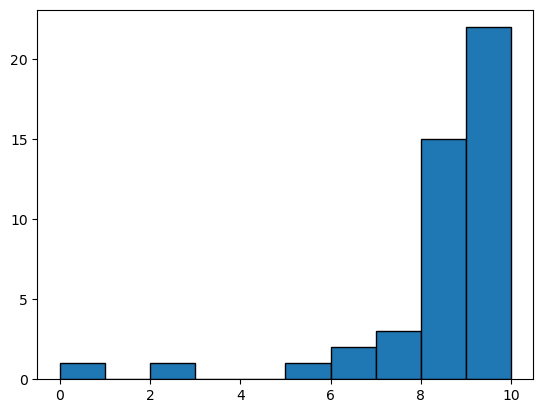

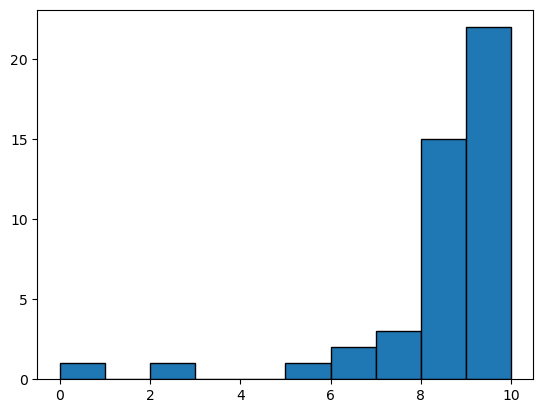

In [50]:
# To visualize the information, we can use Matplotlib as a simple solution.
# First, import this guy:
import matplotlib.pyplot as plt

# Calculate the histogram of the summary score column, then plot by using plt.hist
counts, bins = np.histogram(avg_grades, bins=range(11))
plt.hist(bins[:-1], bins, edgecolor='black', weights=counts)

# Calculate the histogram and plot it once with the command plt.hist
plt.figure()
plt.hist(avg_grades, bins=range(11), edgecolor='black');

In [51]:
# Add the summary score column to the array of 4 component score columns
np.concatenate((p4ds_grades, avg_grades.reshape(-1, 1)), axis=1)

array([[ 0.        ,  0.        ,  0.        ,  0.5       ,  0.25      ],
       [10.        , 10.        , 10.        ,  9.5       ,  9.75      ],
       [10.        ,  9.25      ,  9.        ,  7.        ,  8.20833333],
       [10.        ,  9.5       ,  9.85      ,  8.        ,  8.89166667],
       [10.        ,  9.75      ,  9.75      ,  9.        ,  9.41666667],
       [10.        , 10.        , 10.        ,  8.5       ,  9.25      ],
       [10.        , 10.        ,  9.75      ,  9.        ,  9.45833333],
       [10.        ,  9.5       ,  9.7       ,  9.        ,  9.36666667],
       [10.        ,  9.75      ,  9.35      ,  9.        ,  9.35      ],
       [10.        , 10.        ,  9.6       ,  8.        ,  8.93333333],
       [ 9.        ,  9.25      ,  9.9       ,  7.5       ,  8.44166667],
       [10.        , 10.        , 10.        ,  8.        ,  9.        ],
       [10.        ,  8.5       ,  5.75      ,  7.        ,  7.54166667],
       [10.        ,  9.5       ,  9.7

Ok, let's go back to the homework : D

## Data collections

In this assignment, we only consider using legacy datasets that have already been collected and published by others. You can download it [here](https://files.grouplens.org/datasets/movielens/ml-100k/u.data) and save it with the name "u.data" (note that there is no .txt or anything else for the extension of this file).

According to the [description of this dataset](https://files.grouplens.org/datasets/movielens/ml-100k-README.txt):
> MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
> 
> This data set consists of:
> * 100,000 ratings (1-5) from 943 users on 1682 movies. 
> * Each user has rated at least 20 movies.  
> * Simple demographic info for the users (age, gender, occupation, zip)
>
> The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

And the specific description for the file "u.data":
> The full u data set, 100000 ratings by 943 users on 1682 items. Each user has rated at least 20 movies. Users and items are numbered consecutively from 1. The data is randomly ordered. This is a tab separated list of user id | item id | rating | timestamp. The time stamps are unix seconds since 1/1/1970 UTC 

## Data explorations

### Task: How many rows (observations) and columns (attributes) does the data have? <font color=green>(0.5 Points)</font>

At first, your task is to read the data file "u.data" into a NumPy array named "raw_ratings" (use the np.genfromtxt method). You need to set the dtype to np.int64. You also need to put "u.data" in the same directory as this notebook, and when you call the np.genfromtxt method, you just need to use the filename "u.data" as a parameter of this method.

In [61]:
# YOUR CODE HERE
raw_ratings = np.genfromtxt('u.data', delimiter='\t', skip_header=0, dtype=np.uint64)
n_rows = raw_ratings.shape[0]
n_cols = raw_ratings.shape[1]

In [62]:
# TEST
assert raw_ratings.dtype == np.uint64
assert raw_ratings.ndim == 2
assert n_rows == 100000
assert n_cols == 4
raw_ratings[:5] 

array([[      196,       242,         3, 881250949],
       [      186,       302,         3, 891717742],
       [       22,       377,         1, 878887116],
       [      244,        51,         2, 880606923],
       [      166,       346,         1, 886397596]], dtype=uint64)

### What does each row (observation) mean? Is there a phenomenon where rows (observations) have different meanings?

A line indicates a user's scoring information for a movie, according to the data description file and preliminary data assessment. There doesn't have seemed to be an outlier line. 

### Are there any duplicate rows in the data? <font color=green>(0.5 Points)</font>

In this task, you will check if there are duplicate observations and store the result into the "have_duplicated_rows" variable. This variable has a boolean datatype that represents whether the data has duplicate observations or not.

In [69]:
# YOUR CODE HERE
have_duplicated_rows = np.unique(raw_ratings, axis=0).shape[0] != raw_ratings.shape[0]

In [70]:
# TEST
assert have_duplicated_rows == False

### What do the columns in the data mean?

According the description file of this dataset:
- The first column represents the user id.
- The second column represents the movie id.
- The third column represents the rating that users give for the respective movie.
- The fourth column represents the time that the user gives the rating (calculated by seconds from the standard milestone).

### What data type does each column currently have? Is there a column with a data type that is not suitable for further processing?

At present, all columns have a numeric datatype.

In [71]:
raw_ratings.dtype

dtype('uint64')

All columns have suitable datatype.

Do you believe the time column for rating has the correct data type? This column represents time numerically (seconds from the standard milestone). We still calculate minimum, maximum, etc., for this column; and we can convert minimum, maximum values, etc., to date format for easier viewing when necessary. Of course, we can convert this column to date format right now; then, we calculate the minimum, maximum, etc., so that the result will be in date format. However, we do not follow this way in this case because the columns in a Numpy array should all be of the same data type. If you do it this way, your data will be divided into two arrays: one for the column at hand and one for the column at large. 

### For each column with numeric and datetime data types, how are the values distributed? <font color=green>(1 Points)</font>

At first glance, it appears that all of the columns are numerical. However, we should categorize the "user id" and "movie id" columns (the first two columns). As a result, there will be two numeric columns: the score column (index column 2) and the score time column (index column 3).

How many missing values do these two numerical columns have?

Your task is to answer this question, you see the result by run the code cell below.

In [72]:
np.sum(np.isnan(raw_ratings[:, 2:]), axis=0)

array([0, 0])

Your task is to compute the minimum, median, and maximum values for the two columns (using the function `np.percentile`, with `interpolation` set to `linear` by default); then, save the results to `rate_col_profile` and `rate date_col_profile`, respectively. These are two one-dimensional numpy arrays, with `rate_col_profile` having a real numeric `dtype` and `rate_date_col_profile` having a `'datetime64[s]'` `dtype`. 

Hint: When casting an array, you can pass the type to be cast as a string.

In [78]:
# YOUR CODE HERE
rate_col = raw_ratings[:, 2].reshape(-1)
rate_date_col = np.array(raw_ratings[:, 3].reshape(-1), dtype=np.datetime64)

rate_col_profile = [np.percentile(rate_col, i) for i in range(0, 101, 50)]
rate_date_col_profile = [np.percentile(rate_date_col, i) for i in range(0, 101, 50)]

In [79]:
# TEST
assert np.array_equal(rate_col_profile, np.array([1., 4., 5.]))
assert np.array_equal(rate_date_col_profile, 
                      np.array(['1997-09-20T03:05:10', 
                                '1997-12-22T21:42:24',
                                '1998-04-22T23:10:38'], 
                               dtype='datetime64[s]'))

The min and max values of these two columns are not unexpected, and they correspond to the data description file. 

### With each categorical column, how are values distributed? <font color=green>(1 Points)</font>

As mentioned, the 2 categorical columns are the first 2 columns. How many missing values in these columns:

In [80]:
np.sum(np.isnan(raw_ratings[:, :2]), axis=0)

array([0, 0])

Your task is to compute a list of five numbers for each column: the number of different values; the value that appears at least twice with the same number of occurrences (total of two numbers); and the value that appears the most times with the same number. count of occurrences (a total of 2 numbers). You save two calculated lists with two columns each into two variables, `user_col_profile` and `movie_col_profile`, respectively.

We all concur that if multiple values appear, take the smallest value; if multiple values appear only once, take the largest value. 

Hint:
- <span style="color:dodgerblue">If you set `stable` as the value for the `kind` parameter in the sort NumPy function, NumPy will sort your input array while ensuring that the same values in the original array remain in relative order in the resulting array.</span>

In [84]:
a = np.array([1, 2, 3, 4, 2, 3])

(array([1, 2, 3, 4]), array([1, 2, 2, 1]))

In [94]:
# YOUR CODE HERE
unique_user, user_count = np.unique(raw_ratings[:, 0], return_counts=True)
unique_movie, movie_count = np.unique(raw_ratings[:, 1], return_counts=True)

sort_user_count = np.sort(user_count, kind='stable')
sort_movie_count = np.sort(movie_count, kind='stable')

user_col_profile = [len(np.unique(raw_ratings[:, 0])), 0, sort_user_count[0], 0, sort_user_count[-1]]
movie_col_profile = [len(np.unique(raw_ratings[:, 1])), 0, sort_movie_count[0], 0, sort_movie_count[-1]]

user_col_profile, movie_col_profile

([943, 0, 20, 0, 737], [1682, 0, 1, 0, 583])

In [ ]:
assert user_col_profile==[943, 
                          19,  
                          20,  
                          405, 
                          737] 
assert movie_col_profile==[1682,
                           599, 
                           1,   
                           50,  
                           583]

This information matches the data description file:
> The full u data set, 100000 ratings by 943 users on 1682 items. Each user has rated at least 20 movies. Users and items are numbered consecutively from 1.

That means "Users and items are numbered consecutively from 1" untested from the results above. Below, we will test this idea:

In [ ]:
print('User id  - min & max:', 
      raw_ratings[:, 0].min(), '&', raw_ratings[:, 0].max()) 
print('Movie id - min & max:', 
      raw_ratings[:, 1].min(), '&', raw_ratings[:, 1].max()) 

## Ask a meaningful question that needs answering

We now have a better understanding of the data. Let's see if there are any meaningful questions that this data can answer. *"For each user, which movies should we recommend (recommend) for the user to watch?"* is one possible question. Answering this question will benefit both users and movie service providers.
- User: A user may want to watch a movie, but there are many movies to choose from, and the user is unsure which one to watch. It would be extremely helpful for users if the system could recommend a list of movies that they are more likely to enjoy.
- Movie service providers: if the recommendation system is good, users are more likely to watch the movie and enjoy it, which means they will continue to pay for the service.

---

## Data preprocessing <font color=green>(1 Points)</font>

To create a recommendation system, first create an array of ratings from the initial data array `raw_ratings`, which includes the number of users for rows and the number of movies for columns. The entry `ratings[i, j]` indicate how many points were assigned to the movie with id `j` by the user with id `i`. If no value is specified, the value will be `nan`. Because Python indexes from 0, you should also change the user and movie ids to begin at 0 (instead of 1).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert ratings.shape == (943, 1682)
missing_ratios = np.mean(np.isnan(ratings))
assert missing_ratios.round(3) == 0.937 # It has a nan value of 93.7%! :)

---

## Analyze data to answer the question <font color=green>(6 Points)</font>

We will need to do two things in order to be able to recommend movies to each user:
- Stage 1: predict each user's score for movies that they have not seen (in other words, enter nan values in the `ratings` array).
- Stage 2: recommending movies (that the user has not seen) with high prediction scores to the user.

In this assignment, we will only cover stage 1.

First, we'll go over how to predict a user's score.

In [ ]:
# Assume we have the data example ratings stored in a Numpy array.
# In this data, each column corresponds to a movie, 
# and each row corresponds to a user, 
# and each row indicates how many stars that user gave to each movie (from 1 to 5 stars).

example_ratings = np.array([
    [5, 4, np.nan, 1, np.nan],
    [np.nan, 4, 4, 2, 2],
    [3, np.nan, np.nan, 5, 5],
    [np.nan, 3, 4, 4, np.nan]
])

example_ratings

The goal here is to predict each user's missing values and then recommend movies that we believe will receive high ratings.

For the sake of clarity, we will only focus on creating the first user here.

In [ ]:
# Calculate the weight of the similarity 
# between the first user and all users
r0 = example_ratings[0]
a = np.abs(example_ratings - r0)
a = np.nanmean(a, axis=1) # Skip the nan value
w = 1 / (a + 0.001) # Plus 0.001 to avoid divide by Zero
w

In [ ]:
# Get the columns corresponding to the movies 
# that the first user has not given a score
a = example_ratings[:, np.isnan(r0)]
a

In [ ]:
# Calculate the normalized weight matrix 
# with the same shape as the result above 
# (sum of columns will be 1)
normalized_w = ~np.isnan(a) * w.reshape(-1, 1)
normalized_w = normalized_w / normalized_w.sum(axis=0)
normalized_w

In [ ]:
# Multiply the rating by the normalized weight 
# and add it up to get the prediction score for the first user
np.nansum(a * normalized_w, axis=0)
# Thus, we can recommend to the first user a movie with a high prediction score.

As a result, we can recommend a movie with a high prediction score to the first user. You will collaborate with all users in this assignment. However, you will not use loops and do it one by one for each user because Numpy dislikes loops (<span style="color:dodgerblue">specifically, Python's loops are very slow, so we should use NumPy to speed up the computation there</span>). Instead, you will do it all at once for all users. To do this, calculate the rating for all movies for each user; if you only score for movies that have not been scored, it will be difficult to do it for all users at the same time because each user will have a different number of movies that have not been scored. Scoring for movies that already have points is redundant (the recalculated score will be very close to the original score because the original score has the most weight), but it may help speed things up because we can do it with all users at once.

If you try it, you'll discover that you can't do it with all users at once because the intermediate result arrays will be about number of users $\times$ number of users $\times$ number of movies, and <span style="color:red">there won't be enough memory</span>. One way to avoid having to browse each user again is to browse a group of users at once (called a batch) and predict their scores; the size of the intermediate result arrays will be reduced to about the number of users-of-a-batch $\times$ number of users $\times$ number of movies. So, in this case, you will be able to browse each batch using the loop (group of users).

A `batch_size` of 32 will be used (the number of users per group). Finally, you'll fill the array `filled_ratings` with all of the movie scores; We only interested in the fill values that correspond to the nan values in the original `ratings` array (you can give other values anyway). Take care not to change the `ratings` array during the process.

In [ ]:
batch_size = 32
filled_ratings = np.empty_like(ratings)

I don't mean to scare you, but the setup is quite complicated, requiring knowledge of a mechanism known as <font color=green>broadcasting</font> as well as the ability to imagine three dimensional (higher dimensional, 4 or 5, etc.). As a result, you will first attempt this with a batch. I'll help you by breaking it down into steps and providing you with a test suite for each one. When switching from working with a single user to working with a batch size user, keep in mind that arrays will have an extra dimension at the top with the `batch_size` corresponding to the `batch_size` user. You will do the actual work with all of the data after the code has been successfully run with a batch.

## Tutorial: A brief knowledge about <font color=green>broadcasting</font>

But at first, we should know what is <font color=green>broadcasting</font>. It is Numpy's mechanism that allows computations to be performed on arrays that do not have the same shape as if they did (this will be done effectively below: it will not create new arrays of the same shape).

For example: 

`a = np.array([1, 2, 3])`

`a + 10`

[Broadcasting rules](https://numpy.org/devdocs/user/quickstart.html#broadcasting-rules):

- Rule 1: if all input arrays do not have the same number of dimensions, a “1” will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions.
- Rule 2: arrays with a size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is assumed to be the same along that dimension for the “broadcast” array.
- After application of the broadcasting rules, the sizes of all arrays must match.

In [ ]:
# Example 1
a = np.array([[4, 5, 6],
              [7, 8, 9]])
a + 10

Here is an explanation in detail:
```
shape of a:  2, 3
shape of 10: 
              1, 1  [[10]]
              2, 1  [[10],
                     [10]]
              2, 3  [[10, 10, 10],
                     [10, 10, 10],
                     [10, 10, 10]]
```

In [ ]:
# Example 2
a = np.array([[4, 5, 6],
              [7, 8, 9]])
b = np.array([[1, 2, 3]])
a * b

Here is an explanation in detail:
```
shape of a: 2, 3
shape of b: 1, 3  [[1, 2, 3]]
             2, 3  [[1, 2, 3],
                    [1, 2, 3]]
```

In [ ]:
# Example 3
a = np.array([[4, 5, 6],
              [7, 8, 9]])
b = np.array([1, 2, 3])
a * b

Here is an explanation in detail:
```
shape of a: 2, 3
shape of b: 3     [1, 2, 3]
             1, 3  [[1, 2, 3]]
             2, 3  [[1, 2, 3],
                    [1, 2, 3]]
```

In [ ]:
# Broadcasting - Example 4
a = np.array([[4],
              [5],
              [6]])
b = np.array([1, 2, 3])
a * b

Here is an explanation in detail:
```
shape of a: 3, 1  [[4],
                    [5],
                    [6]]
             3, 3  [[4, 4, 4],
                    [5, 5, 5],
                    [6, 6, 6]]
shape of b: 3     [1, 2, 3]
             1, 3  [[1, 2, 3]]
             3, 3  [[1, 2, 3],
                    [1, 2, 3],
                    [1, 2, 3]]
```

In [ ]:
# Broadcasting - Exampl 5

# a = np.array([[4, 5, 6],
#               [7, 8, 9]])
# b = np.array([1, 2])
# a * b

# There will error when you try to uncomment and run this cell?
# Why it happen? Easy!! Just pay attention of the shape
# shape of a: 2, 3
# shape of b: 1, 2

In [ ]:
# Applying broadcasting:
# Normalize so that columns of array data have mean = 0 & std = 1
# (How to do: subtract each column's mean by that column's std, then divide by that column's std)

# First: Initialize data
data = np.random.randint(0, 10, (20, 2))
data[:, 1] *= 3

# Then: Normalize so columns of array data have mean = 0 & std = 1
data = (data - data.mean(axis=0)) / data.std(axis=0)

print(data.mean(axis=0))
print(data.std(axis=0))

## Ok, let's go back to the homework : D

At first, you will attempt to do it with a single batch that corresponds to users who have an id from beginning `start` to end `end` <font color=green>(5.5đ)</font>.

In [ ]:
start = 0
end = batch_size

Step 1: Compute the array `similarities`, which indicates the similarity between each user in the considering batch and all users in the entire dataset. The size of this array will be `batch_size` $\times$ `n_users` (`n_users` is the total number of users in the dataset), and `similarities[i, j]` indicates the similarity between index user at index $i$ and user at index $i$. 

<span style="color:dodgerblue">When two users have no movies in common (when running, you may see a warning "RuntimeWarning: Mean of empty slice"), then you assign the similarity with a value of 0.</span>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# TEST
assert similarities.shape == (32, 943)
assert np.array_equal(similarities[:3, :3].round(1), 
                      np.array([[1.0e+03, 1.1e+00, 7.0e-01],
                                [1.1e+00, 1.0e+03, 7.0e-01],
                                [7.0e-01, 7.0e-01, 1.0e+03]]))

Step 2: Compute the weight array `weights` as a `similarity` normalized array. The similarity to all other users is normalized for each movie for each user in the batch under consideration; for users who have given movie scores, it is normalized by dividing the similarity by the total similarity that is considered only for users who have given movie scores, with the rest of the users normalized by giving similarity zero. The dimensions of the array `weights` will be `batch_size` x `n_users` x `n_movies` (where `n_movies` is the sum of the number of movies in the dataset).

<span style="color:dodgerblue">When you run the code, you will see the message "RuntimeWarning: invalid value encountered in true divide." This is because the users who have a rating for the movie in question have a similarity of 0, resulting in normalization going to 0/0 and the result being nan. In this case, it means that there is insufficient information to predict the score, and you will leave it as is for this assignment.</span>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# TEST
assert weights.shape == (32, 943, 1682)
assert np.sum(np.isnan(weights)) == 31119

Step 3: Calculate the score (for all movies) for each user in the batch under consideration by multiplying the scores of all users by the corresponding weights in the `weight` array; then write each user's scores down one line in the `filled_ratings` array.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# TEST
filled_batch = filled_ratings[start:end]
filled_nanvals = filled_batch[np.isnan(ratings[start:end])]
assert np.array_equal(filled_nanvals[:13].round(1), np.array(
    [3.6, 3.5, 4., 3.8, 3.5, 3.2, 3.4, 3.1, 3.2, 3.7, 3.7, 3.2, 4.3]))
assert np.array_equal(filled_nanvals[-13:].round(1), np.array(
    [3., 1., 2., 3., 4., 3., 2., 3., 1., 3., 2., 3., 3.]))

Your code has run OK with a batch, now you can do it for real on all the data <font color=green>(0.5 Points)</font>.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# TEST
filled_nanvals = filled_ratings[np.isnan(ratings)]
assert np.array_equal(filled_nanvals[13:26].round(1), np.array(
    [3.1, 3.6, 3.9, 1.4, 3.1, 3.3, 3., 3.8, 3.8, 3.4, 3.4, 4., 3.8]))
assert np.array_equal(filled_nanvals[-26:-13].round(1), np.array(
    [3., 3., 1., 2., 1., 2.5, 2., 3.2, 2., 2., 3., 3., 2.]))

This is the end of Lab 2 (￣▽￣) Good luck!